### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression # to create sample data
from sklearn.model_selection import train_test_split # to split data into test and train
from sklearn.preprocessing import StandardScaler # to Standardize the data
from sklearn import linear_model # for comparing the results
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

### Preparing the Dataset

In [2]:
X, y = make_regression(n_samples=50000, n_features=15, n_informative=10,
                             random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementation of Linear regression

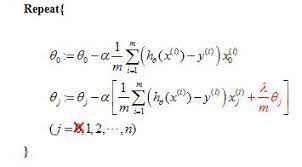

In [3]:
class linear_regression():
    def __init__(self, learning_rate, regularization_constant, verbose = True):
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.weights = 0
        self.bais = 0
        self.verbose = verbose
        
    def squared_error(self, a, b):
        return (a-b)**2
    
    def gradient_weights(self, weights, x, y, bais ):
        return (weights.dot(x) + bais - y)*x
    
    def gradient_bais(self, weights, x, y, bais):
         return (weights.dot(x) + bais - y)
        
    def fit(self, x_train, y_train, epoch): 
        weights = np.zeros(x_train.shape[1])
        bais = 0
        n = len(y_train)
        mean_error = []
        for _ in tqdm(range(epoch)):
            dw, db = 0, 0
            for x,y in zip(x_train, y_train):
                dw += self.gradient_weights(weights, x, y, bais)
                db += self.gradient_bais(weights, x, y, bais)
            weights = weights - self.learning_rate *(( dw + self.regularization_constant)/n)
            bais = bais -  self.learning_rate * db/n
            if self.verbose == True:
                a = []
                for x,y in zip(x_train, y_train):
                    a.append(self.squared_error( y, weights.dot(x) + bais))
                mean_error.append(math.sqrt(sum(a)/len(a)))    
        self.weights = weights
        self.bais = bais
        if self.verbose == True:
            return mean_error
    
    def predict(self, x_test):
        return self.weights.dot(x_test) + self.bais

In [12]:
lr = linear_regression(learning_rate = 0.1, regularization_constant = 0.0001, verbose = True) 
m = lr.fit(X_train, y_train, 80)

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:26<00:00,  3.06it/s]


### Plotting the Root Mean Squared Error after every epoch

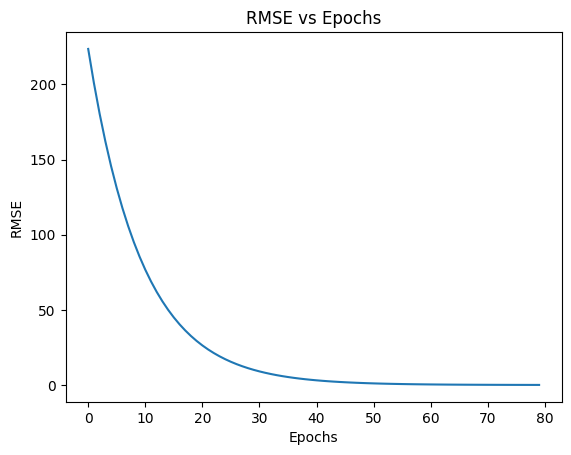

In [28]:
plt.plot(m)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs Epochs')
plt.show()

### Performance on Test Data

In [15]:
a = []
for x,y in zip(X_test, y_test):
    a.append((lr.predict(x)- y)**2)
print(math.sqrt(sum(a)/len(a)))

0.04838115713580432


### Comparing with Sklearns implementation

In [18]:
sgd_r = linear_model.SGDRegressor()

In [19]:
sgd_r.fit(X_train, y_train)

SGDRegressor()

In [27]:
a = []
predictions = sgd_r.predict(X_test)
for y_pred, y_true in zip(predictions,y_test): 
    a.append((y_pred- y_true)**2)

print(math.sqrt(sum(a)/len(a)))

0.024302932711778545
